__Find the lowest eigenvalue of the following matrix:__

__$$
Hermitian Matrix = \left[
\begin{array}{ccc}
1 & 0 & 0 & 0  \\
0 & 0 & -1 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0  & 0 & 1
\end{array}
\right]
$$__

__Using VQE_like circuits by yourself from scratch__


1. It requires decomposing the matrix to the sum of Pauli terms.
2. Decomposition involves only terms consisting of the same matrices, i.e.: II, XX, YY, ZZ, and the coefficients are from the set [-1/2, -1, 0, 1, 1/2].
3. The ansatz you can use is: (RX I) CX (HI) |00>, where angle in RX is your variational parameter.
4. You can find an explanation of VQE in this blog post, You can also find links to further resources there.
5. You can just search through all angles for RX, you don’t need to use any optimizers like gradient descent.

In [2]:
from qiskit import*
from qiskit.visualization import*
from math import*
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# First, let´s define Hermitian matrix as H

H = np.matrix([[1,0,0,0],[0,0,-1,0],[0,-1,0,0],[0,0,0,1]])

__To write Hermitian Matrix above sum of pauli terms (XX,YY,ZZ,II) we can use the following expression:__

In [6]:
xx = np.matrix([[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])
yy = np.matrix([[0,0,0,-1],[0,0,1,0],[0,1,0,0],[-1,0,0,0]])
zz = np.matrix([[1,0,0,0],[0,-1,0,0],[0,0,-1,-0],[0,0,0,1]])
ii = np.matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

coef_xx = 0.25*np.trace(np.matmul(xx,H))
coef_yy = 0.25*np.trace(np.matmul(yy,H))
coef_zz = 0.25*np.trace(np.matmul(zz,H))
coef_ii = 0.25*np.trace(np.matmul(ii,H))

print('H = %.1fxx + %.1fyy + %.1fzz + %.1fii ' %(coef_xx,coef_yy,coef_zz,coef_ii))

H = -0.5xx + -0.5yy + 0.5zz + 0.5ii 


In [7]:
def var_circuit (variational_parameter):
    circ = QuantumCircuit(2)
    circ.rx(variational_parameter,0)
    
    circ.ry(variational_parameter,1)
    circ.cx(0,1)
    circ.h(0)
    circ.i(1)
    
    return circ
    


def measureZZ (given_circuit):
    zz_meas = given_circuit.copy()
    zz_meas.measure_all()
    return zz_meas


def measure_ZZ(given_circuit,num_shots=10000):
    
    zz_meas = measureZZ(given_circuit)
    
    result = execute(zz_meas,Aer.get_backend('qasm_simulator'),shots = num_shots).result()
    counts = result.get_counts(zz_meas)
    
    if '00' not in counts:
        counts['00'] = 0
    if '01' not in counts:
        counts['01'] = 0
    if '10' not in counts:
        counts['10'] = 0
    if '11' not in counts:
        counts['11'] = 0
        
    total_counts = counts['00'] + counts['10'] + counts['01'] + counts['11']
    ZZ = counts['00'] + counts['11'] - counts['01']  - counts['10'] 
    
    zz = ZZ/total_counts
    
    return zz

def measureXX(given_circuit):
    xx_meas = given_circuit.copy()
    xx_meas.h(0)
    xx_meas.h(1)
    xx_meas.measure_all()
    return xx_meas
    
    

def measure_XX(given_circuit, num_shots = 10000):
    
    xx_meas = measureXX(given_circuit)
    
    result = execute(xx_meas,Aer.get_backend('qasm_simulator'),shots=num_shots).result()
    counts = result.get_counts(xx_meas)
    
    if '00' not in counts:
        counts['00'] = 0
    if '01' not in counts:
        counts['01'] = 0
    if '10' not in counts:
        counts['10'] = 0
    if '11' not in counts:
        counts['11'] = 0 
        
    total_counts = counts['00'] + counts['10'] +counts['01'] +counts['11']
    
    XX = counts['00'] + counts['11'] -counts['01'] -counts['10']
    
    XX = XX/total_counts
    
    return XX

def measureYY(given_circuit):
    yy_meas = given_circuit.copy()
    yy_meas.h(0)
    yy_meas.h(1)
    yy_meas.sdg(0)
    yy_meas.sdg(1)
    
    
    yy_meas.measure_all()
    
    return yy_meas

def measure_YY(given_circuit,num_shots = 10000):
    
    yy_meas = measureYY(given_circuit)
    
    result = execute(yy_meas,Aer.get_backend('qasm_simulator'),shots=num_shots).result()
    counts = result.get_counts(yy_meas)
    
    if '00' not in counts:
        counts['00'] = 0
    if '01' not in counts:
        counts['01'] = 0
    if '10' not in counts:
        counts['10'] = 0
    if '11' not in counts:
        counts['11'] = 0
        
    
    total_counts = counts['00']  + counts['10']  + counts['01']  + counts['11']   
    YY =  counts ['00'] + counts['11'] - counts['10'] - counts['01'] 
    YY = YY/total_counts
    
    return YY
    
def measureII(given_circuit):
    II_meas = given_circuit.copy()
    II_meas.measure_all()
    return II_meas

def measure_II(given_circuit,num_shots = 10000):
    
    II_meas = measureII(given_circuit)
    
    result = execute(II_meas,Aer.get_backend('qasm_simulator'),shots = num_shots).result()
    counts = result.get_counts(II_meas)
    
    if '00' not in counts:
        counts['00'] = 0
    if '10' not in counts:
        counts['10'] = 0  
    if '01' not in counts:
        counts['01'] = 0  
    if '11' not in counts:
        counts['11'] = 0

    total_counts = counts['00']  + counts['11'] + counts['01'] +counts['10']

    II= counts['00']  + counts['11'] + counts['10'] + counts['01']
    
    II = II/total_counts
    
    return II

def get_energy(given_circuit,num_shots = 10000):
    
    xx = measure_XX(given_circuit,num_shots=num_shots)
    yy = measure_YY(given_circuit,num_shots=num_shots)
    zz = measure_ZZ(given_circuit,num_shots=num_shots)
    ii = measure_II(given_circuit,num_shots=num_shots)
    
    energy = 0.5*(zz + ii - yy -xx)
    
    return energy
     

Angle: 2.356194  <H>: 0.498800
Angle: 2.390572  <H>: 0.508500
Angle: 2.424950  <H>: 0.490400
Angle: 2.459328  <H>: 0.500400
Angle: 2.493705  <H>: 0.490800
Angle: 2.528083  <H>: 0.477500
Angle: 2.562461  <H>: 0.469100
Angle: 2.596838  <H>: 0.437200
Angle: 2.631216  <H>: 0.424000
Angle: 2.665594  <H>: 0.404000
Angle: 2.699971  <H>: 0.384400
Angle: 2.734349  <H>: 0.367200
Angle: 2.768727  <H>: 0.352200
Angle: 2.803105  <H>: 0.305800
Angle: 2.837482  <H>: 0.291800
Angle: 2.871860  <H>: 0.246000
Angle: 2.906238  <H>: 0.234600
Angle: 2.940615  <H>: 0.200600
Angle: 2.974993  <H>: 0.173500
Angle: 3.009371  <H>: 0.129700
Angle: 3.043748  <H>: 0.100900
Angle: 3.078126  <H>: 0.063500
Angle: 3.112504  <H>: 0.011500
Angle: 3.146882  <H>: -0.013300
Angle: 3.181259  <H>: -0.045100
Angle: 3.215637  <H>: -0.064700
Angle: 3.250015  <H>: -0.102300
Angle: 3.284392  <H>: -0.137700
Angle: 3.318770  <H>: -0.182300
Angle: 3.353148  <H>: -0.202200
Angle: 3.387525  <H>: -0.231600
Angle: 3.421903  <H>: -0.266200

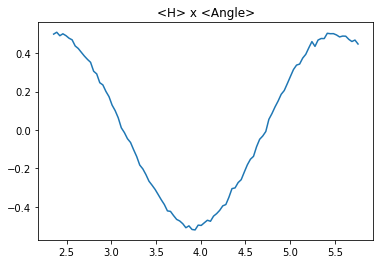

In [8]:
H = []

angle = np.linspace(3*pi/4,11*pi/6,100)

for i in range(0,len(angle)):

    ansatz = var_circuit(variational_parameter= angle[i])
    energy = get_energy(ansatz)
    H.append(enraphiergy)
    print('Angle: %f  <H>: %f' %(angle[i],energy))



    

Angle_min = 2.356194 H_min = -0.519600


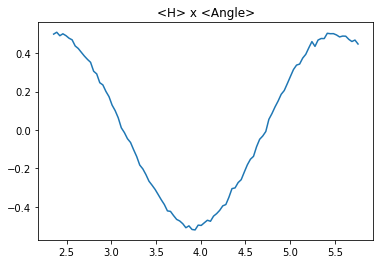

In [9]:
gc = plt.plot(angle,H)
plt.title('<H> x <Angle>')

print('Angle_min = %f H_min = %f' %(min(angle),min(H)))
